<a id="description"></a>

<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:200%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Project Description</b></div> <div style="padding: 40px; border-color: #0ca9e9; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0ca9e9;"> <p> This project addresses the challenge of <b>Research Paper Recommendation</b> and <b>Subject Area Prediction</b> using deep learning and natural language processing techniques on academic abstracts. It aims to help researchers efficiently discover relevant papers and automatically tag them with appropriate subject areas. </p> <h3 style="color:#2E86C1;">🔍 Objective</h3> <p> To build a dual-purpose system that: <ul> <li>Classifies the subject areas of research papers using abstract content</li> <li>Recommends similar academic papers based on semantic similarity</li> </ul> </p> <h3 style="color:#2E86C1;">📊 Dataset</h3> <p> The dataset is sourced from <b>ArXiv</b> and contains: <ul> <li>Paper titles and abstracts</li> <li>Multiple subject area labels (multi-label format)</li> <li>Thousands of labeled examples across diverse fields such as AI, CS, Physics, and more</li> </ul> </p> <h3 style="color:#2E86C1;">🛠️ Technologies Used</h3> <ul> <li><b>Python</b> – Programming language</li> <li><b>TensorFlow & Keras</b> – Deep learning framework</li> <li><b>TextVectorization Layer</b> – For TF-IDF-based text feature extraction</li> <li><b>Scikit-learn</b> – Evaluation and recommendation support</li> <li><b>Pickle</b> – Saving/loading model weights and vectorizer state</li> </ul> <h3 style="color:#2E86C1;">🧠 Model Architecture</h3> <ul> <li><b>Text Vectorization</b> – Using unigrams, bigrams (n-grams)</li> <li><b>Dense Layers</b> – Two fully connected layers (512, 256 neurons) with ReLU activation</li> <li><b>Dropout</b> – Regularization to prevent overfitting</li> <li><b>Sigmoid Output Layer</b> – For multi-label classification of subject areas</li> </ul> <h3 style="color:#2E86C1;">✅ Evaluation</h3> <p> The model performance was assessed using: <ul> <li><b>Binary Accuracy</b></li>  </ul> It achieved strong multi-label classification performance, enabling accurate subject tagging across 165 classes. </p> <h3 style="color:#2E86C1;">🚀 Impact</h3> <p> This system supports: <ul> <li>Efficient research discovery and navigation</li> <li>Automated metadata tagging in digital libraries</li> <li>Enhanced scholarly search engines</li> </ul> </p> </div>

<a id="team"></a>

<div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:200%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Our Team</b></div> <div style="padding: 40px; border-color: #0ca9e9; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0ca9e9;"> <p> This project was conducted as part of the <b>Artificial Intelligence (AI)</b> course, under the academic supervision of <b>Dr. Hany El-Ghaish</b> and <b>Eng. Mohamed El-Sharqawy</b>, Assistant Lecturer. Their guidance played a crucial role in shaping our direction, enhancing our technical understanding, and encouraging us to explore real-world applications of AI.</p> <p> With their insightful feedback and mentorship, we were motivated to design and implement a comprehensive deep learning solution to a meaningful NLP problem. Their support helped us balance theoretical concepts with hands-on practices throughout the project lifecycle. </p> <h3 style="color:#2E86C1;">🤝 Team Members</h3> <ul> <li><b>Ali Ibrahim</b></li> <li><b>Abdel Fattah El Sabagh</b></li> <li><b>Mohamed Tawfik</b></li> <li><b>Mohamed Nasr</b></li> <li><b>Yousef Dewidar</b></li> <li><b>Ali Ashraf</b></li> <li><b>Amr Ghanem</b></li> <li><b>Mohamed Mosaad</b></li> <li><b>Farouk Mohamed</b></li> <li><b>Fares Mahmoud</b></li> <li><b>Karem El Sayes</b></li> <li><b>Abdelrahman El Gammal</b></li> </ul> <h3 style="color:#2E86C1;">🌟 Collaboration Highlights</h3> <ul> <li>Seamless coordination across all stages of the project</li> <li>Active knowledge sharing and group learning sessions</li> <li>Efficient division of tasks based on individual strengths</li> <li>Commitment to quality, innovation, and timely delivery</li> </ul> <p> Our journey through this project has strengthened not only our technical proficiency but also our appreciation for the value of teamwork and mentorship. We extend our gratitude to our instructors and teammates for making this experience rewarding and memorable. </p> </div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Importing Libraries</b></div>

In [7]:
## Main Libraries
# The following libraries are used for data manipulation and analysis.
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

# is used for safely evaluating strings containing Python literals or container displays
# (e.g., lists, dictionaries) to their corresponding Python objects.
from ast import literal_eval

#For Data Spliting
from sklearn.model_selection import train_test_split

# For Text Preprocessing and Building the Model
# The following libraries are used for natural language processing and building the model.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Importing scikit-learn vectorizers for more deployment-friendly text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# for saving and loading the model
import pickle

ModuleNotFoundError: No module named 'tensorflow'

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Reading Data</b></div>

In [2]:
df = pd.read_csv("arxiv_data_210930-054931.csv")
df.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Data Cleaning and Preprocessing</b></div>



In [3]:
df['terms']   # This column contains the terms used in the paper

0                                          ['cs.LG']
1                                 ['cs.LG', 'cs.AI']
2                      ['cs.LG', 'cs.CR', 'stat.ML']
3                                 ['cs.LG', 'cs.CR']
4                                          ['cs.LG']
                            ...                     
56176                             ['cs.CV', 'cs.IR']
56177    ['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']
56178                                      ['cs.LG']
56179                ['stat.ML', 'cs.LG', 'math.OC']
56180                  ['cs.LG', 'cs.AI', 'stat.ML']
Name: terms, Length: 56181, dtype: object

In [4]:
df['terms'].unique() #Show all the unique terms in the column

array(["['cs.LG']", "['cs.LG', 'cs.AI']", "['cs.LG', 'cs.CR', 'stat.ML']",
       ..., "['cs.LG', 'cs.AI', 'math.PR']",
       "['cs.LG', 'stat.ME', 'stat.ML', 'I.2.0; G.3']",
       "['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']"], dtype=object)

In [2]:
df['terms'].value_counts()[:10]  #Show the top 10 terms with their counts


NameError: name 'df' is not defined

In [6]:
df.duplicated().sum()   # Check for duplicates in the dataset

15054

In [7]:
df.drop_duplicates(inplace=True)   # Remove duplicates

In [8]:
df.duplicated().sum()   # Check for duplicates in the dataset

0

In [9]:
df.shape   # Check the shape of the dataset

(41127, 3)

In [10]:
df.isna().sum()

terms        0
titles       0
abstracts    0
dtype: int64

In [11]:
df['terms']    # there is some targets only appears one time
# We will remove these targets from the dataset

0                                          ['cs.LG']
1                                 ['cs.LG', 'cs.AI']
2                      ['cs.LG', 'cs.CR', 'stat.ML']
3                                 ['cs.LG', 'cs.CR']
4                                          ['cs.LG']
                            ...                     
56173                                    ['stat.ML']
56175                           ['stat.ML', 'cs.LG']
56176                             ['cs.CV', 'cs.IR']
56177    ['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']
56179                ['stat.ML', 'cs.LG', 'math.OC']
Name: terms, Length: 41127, dtype: object

In [12]:
term_counts = df['terms'].value_counts()       # Count the occurrences of each term
common_terms=term_counts[term_counts >1].index   # Get the terms that appear more than once

In [13]:
df=df[df['terms'].isin(common_terms)]  # Filter the DataFrame to keep only the common terms


In [14]:
df['terms'].value_counts()[df['terms'].value_counts()==1]   # Check if there are any terms that appear only once

Series([], Name: count, dtype: int64)

In [15]:
df.shape  # Check the shape of the dataset again

(38623, 3)

In [16]:
# Convert the 'terms' column to a list of terms

df['terms']=df['terms'].apply( literal_eval)   # Convert the string representation of lists to actual lists

In [17]:
df['terms'].values[:5]  # Check the first 5 values of the 'terms' column

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML']), list(['cs.LG', 'cs.CR']),
       list(['cs.LG'])], dtype=object)

In [55]:
df['terms'].unique

<bound method Series.unique of 0                          [cs.LG]
1                   [cs.LG, cs.AI]
2          [cs.LG, cs.CR, stat.ML]
3                   [cs.LG, cs.CR]
4                          [cs.LG]
                   ...            
56170                      [cs.CV]
56173                    [stat.ML]
56175             [stat.ML, cs.LG]
56176               [cs.CV, cs.IR]
56179    [stat.ML, cs.LG, math.OC]
Name: terms, Length: 38623, dtype: object>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Data Spliting</b></div>


In [18]:
#split the dataset into train, test and validation sets
# The dataset is split into three parts: training, testing, and validation.

train_df, test_df=train_test_split(df, test_size=0.1, random_state=42,stratify=df['terms'])
val_df=test_df.sample(frac=0.5, random_state=42)   # Split the test set into validation and test sets
# The validation set is 50% of the test set, so the test set will be 50% of the original test set.
test_df=test_df.drop(val_df.index)  # Drop the validation set from the test set
# Check the sizes of the train, test, and validation sets
print(f"Train size : {len(train_df)}")
print(f"Test size : {len(test_df)}")
print(f"Validation size : {len(val_df)}")

Train size : 34760
Test size : 1931
Validation size : 1932


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Target Preparing</b></div>


In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create and fit the MultiLabelBinarizer on the terms
mlb = MultiLabelBinarizer()
mlb.fit(train_df['terms'])

# Get the classes (vocabulary)
vocab = mlb.classes_
print(f"Number of classes: {len(vocab)}")
print("Sample classes:", vocab[:10])

Number of classes: 164
Sample classes: ['14J60 (Primary) 14F05, 14J26 (Secondary)' '60L10, 60L20' '62H30' '62H35'
 '62H99' '65D19' '68' '68Q32' '68T01' '68T05']


In [20]:
len(vocab) # This is the size of the vocabulary, which is the number of unique terms in the dataset.

164

In [22]:
# Transform the labels to multi-hot encoded format
train_labels = mlb.transform(train_df['terms'])
val_labels = mlb.transform(val_df['terms'])
test_labels = mlb.transform(test_df['terms'])

# Show a sample of multi-hot encoding
sample = df['terms'][0]
print("Original sample:", sample)
binarized_sample = mlb.transform([sample])[0]
print("Binarized sample:", binarized_sample)
print("Number of active classes:", sum(binarized_sample))

Original sample: ['cs.LG']
Binarized sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of active classes: 1


In [23]:
# Function to convert binarized labels back to original terms
def invert_multi_hot(encoded_labels):
    return [vocab[i] for i, val in enumerate(encoded_labels) if val == 1]

print("Reconstructed sample:", invert_multi_hot(binarized_sample))


Reconstructed sample: ['cs.LG']


"""<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Text Vectorization with Scikit-learn</b></div>

"""

In [24]:
# Creating a more deployment-friendly text vectorizer using scikit-learn's TfidfVectorizer
# This is easier to serialize and load in production environments

# First, let's determine vocabulary size
vocabulary = set()  # This creates an empty set to store unique words
train_df['abstracts'].str.lower().str.split().apply(vocabulary.update)
vocab_size = len(vocabulary)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 159041


In [25]:
# Initialize TfidfVectorizer with unigrams and bigrams (n-grams)
tfidf_vectorizer = TfidfVectorizer(
    max_features=min(100000, vocab_size),  # Limit to prevent memory issues
    ngram_range=(1, 2),                    # Include unigrams and bigrams
    stop_words='english',                  # Remove common English stop words
    min_df=5                               # Minimum document frequency
)

# Fit the vectorizer on the training abstracts
tfidf_vectorizer.fit(train_df['abstracts'])

print(f"Actual vocabulary size used: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Sample feature names: {list(tfidf_vectorizer.vocabulary_.keys())[:5]}")


Actual vocabulary size used: 100000
Sample feature names: ['early', 'automl', 'frameworks', 'focused', 'optimizing']


In [26]:
# Transform the abstracts into TF-IDF vectors
train_features = tfidf_vectorizer.transform(train_df['abstracts'])
val_features = tfidf_vectorizer.transform(val_df['abstracts'])
test_features = tfidf_vectorizer.transform(test_df['abstracts'])

print(f"Train features shape: {train_features.shape}")
print(f"Validation features shape: {val_features.shape}")
print(f"Test features shape: {test_features.shape}")

Train features shape: (34760, 100000)
Validation features shape: (1932, 100000)
Test features shape: (1931, 100000)


"""<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Converting to TensorFlow Dataset Format</b></div>

"""

In [28]:
import scipy.sparse as sp
from tensorflow.keras.utils import Sequence

class SparseDataGenerator(Sequence):
    """
    Generator that converts sparse matrices to dense in small batches to avoid memory issues
    """
    def __init__(self, X_sparse, y, batch_size):
        self.X_sparse = X_sparse
        self.y = y
        self.batch_size = batch_size
        
    def __len__(self):
        return int(np.ceil(self.X_sparse.shape[0] / self.batch_size))
    
    def __getitem__(self, idx):
        # Get batch indices
        start_idx = idx * self.batch_size
        end_idx = min((idx + 1) * self.batch_size, self.X_sparse.shape[0])
        
        # Extract and convert batch data
        X_batch = self.X_sparse[start_idx:end_idx].toarray()
        y_batch = self.y[start_idx:end_idx]
        
        return X_batch, y_batch

# Create data generators
batch_size = 128
train_generator = SparseDataGenerator(train_features, train_labels, batch_size)
val_generator = SparseDataGenerator(val_features, val_labels, batch_size)
test_generator = SparseDataGenerator(test_features, test_labels, batch_size)

# Print out some information
print(f"Number of training batches: {len(train_generator)}")
print(f"Number of validation batches: {len(val_generator)}")
print(f"Number of test batches: {len(test_generator)}")

# Check the shape of a single batch
X_sample, y_sample = train_generator[0]
print(f"Sample batch X shape: {X_sample.shape}")
print(f"Sample batch y shape: {y_sample.shape}")

Number of training batches: 272
Number of validation batches: 16
Number of test batches: 16
Sample batch X shape: (128, 100000)
Sample batch y shape: (128, 164)


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Model Training</b></div>




In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
# Use the feature size from the vectorizer and class count from the vocabulary
input_dim = train_features.shape[1]  # Number of features from TF-IDF
output_dim = len(vocab)              # Number of subject area classes

model = keras.Sequential([
    # Input layer
    layers.Input(shape=(input_dim,)),
    
    # First dense layer
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),

    # Second dense layer
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),

    # Third dense layer
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),

    # Fourth dense layer
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(output_dim, activation='sigmoid')
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model using the generators
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


C:\Users\moham\.conda\envs\tensorGPU\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


272/272 ━━━━━━━━━━━━━━━━━━━━ 169s 613ms/step - binary_accuracy: 0.8497 - loss: 0.3571 - val_binary_accuracy: 0.9929 - val_loss: 0.0651
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 164s 604ms/step - binary_accuracy: 0.9925 - loss: 0.0368 - val_binary_accuracy: 0.9944 - val_loss: 0.0238
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 179s 658ms/step - binary_accuracy: 0.9943 - loss: 0.0246 - val_binary_accuracy: 0.9944 - val_loss: 0.0200
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 154s 567ms/step - binary_accuracy: 0.9948 - loss: 0.0211 - val_binary_accuracy: 0.9944 - val_loss: 0.0195
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 160s 587ms/step - binary_accuracy: 0.9950 - loss: 0.0196 - val_binary_accuracy: 0.9944 - val_loss: 0.0193
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 194s 713ms/step - binary_accuracy: 0.9952 - loss: 0.0186 - val_binary_accuracy: 0.9944 - val_loss: 0.0193
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 156s 574ms/step - binary_accuracy: 0.9952 - loss: 0.0182 - val_binary_accuracy: 0.9944 - val_lo

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Metrics Plotting</b></div>




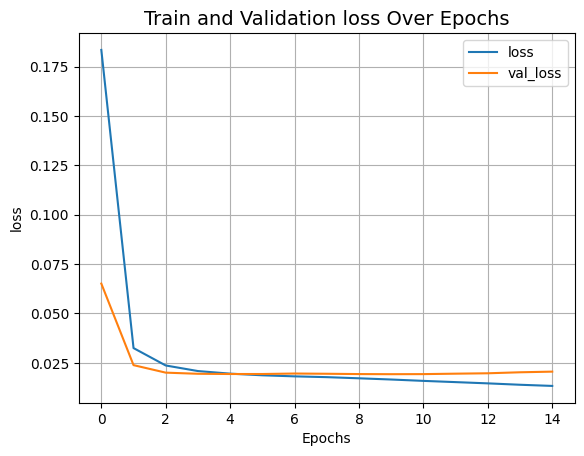

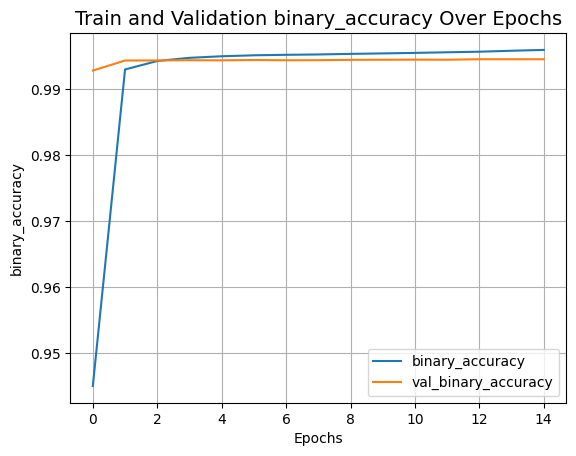

In [30]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Model Evaluation</b></div>



In [32]:
train_loss, binary_acc_train = model.evaluate(train_generator)
val_loss, binary_acc_val = model.evaluate(val_generator)
test_loss, binary_acc_test = model.evaluate(test_generator)

print(f"Binary accuracy on the train set: {round(binary_acc_train * 100, 2)}%.")
print(f"Binary accuracy on the validation set: {round(binary_acc_val * 100, 2)}%.")
print(f"Binary accuracy on the test set: {round(binary_acc_test * 100, 2)}%.")

272/272 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - binary_accuracy: 0.9958 - loss: 0.0140
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - binary_accuracy: 0.9944 - loss: 0.0196
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - binary_accuracy: 0.9945 - loss: 0.0192
Binary accuracy on the train set: 99.57%.
Binary accuracy on the validation set: 99.45%.
Binary accuracy on the test set: 99.45%.


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Save Model & Vectorizer</b></div>




In [33]:
# Save the model
model.save("subject_area_model.keras")

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save the MultiLabelBinarizer
with open('label_binarizer.pkl', 'wb') as f:
    pickle.dump(mlb, f)


    
print("Model and preprocessing components saved successfully!")

Model and preprocessing components saved successfully!


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Test Model </b></div>

In [42]:
from keras.models import load_model
# Load the model
loaded_model = load_model("subject_area_model.keras")

# Load the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# Load the MultiLabelBinarizer
with open('label_binarizer.pkl', 'rb') as f:
    loaded_mlb = pickle.load(f)

# Get vocabulary from the loaded MultiLabelBinarizer
loaded_vocab = loaded_mlb.classes_

print("Model and preprocessing components loaded successfully!")

Model and preprocessing components loaded successfully!


In [47]:
def predict_subject_areas(abstract_text, model, vectorizer, mlb, threshold=0.5):
    # Transform the abstract text using the TF-IDF vectorizer
    abstract_vector = vectorizer.transform([abstract_text])
    
    # Convert to dense array for prediction
    abstract_vector_dense = abstract_vector.toarray()
    
    # Make predictions using the model
    predictions = model.predict(abstract_vector_dense)
    
    # Apply threshold to get binary predictions
    binary_predictions = (predictions[0] > threshold).astype(int)
    
    # Convert binary predictions back to subject area labels
    predicted_subjects = [mlb.classes_[i] for i, val in enumerate(binary_predictions) if val == 1]
    
    return predicted_subjects

In [50]:
input_abstract = """The dominant sequence transduction models are based on complex
recurrent or convolutional neural networks in an encoder-decoder configuration.
The best performing models also connect the encoder and decoder through an attention mechanism.
We propose a new simple network architecture, the Transformer, based solely on attention mechanisms,
dispensing with recurrence and convolutions entirely.
Experiments on two machine translation tasks show these models to be superior 
in quality while being more parallelizable and requiring significantly less time to train. 
Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, i
ncluding ensembles by over 2 BLEU. On the WMT 2014 English-to-French translation task, 
our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 days on eight GPUs, 
a small fraction of the training costs of the best models from the literature.
We show that the Transformer generalizes well to other tasks by applying it successfully to English
constituency parsing both with large and limited training data."""

In [51]:
predicted_terms = predict_subject_areas(input_abstract, loaded_model, loaded_vectorizer, loaded_mlb)
print("Predicted subject areas:", predicted_terms)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted subject areas: ['cs.LG', 'stat.ML']


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0ca9e9; overflow:hidden"><b>Thank you </b></div>


In [46]:
for term in predicted_terms:
    print(term)

cs.LG
stat.ML
